In [2]:
%matplotlib notebook
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy import stats
from statistics import mode
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

from skimage.transform import downscale_local_mean #For binning
from skimage.filters import threshold_otsu, threshold_local

import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays
from statistics import median
from statistics import mode

import sys
#sys.path.append("../kai_colloids/PyDDM") #must point to the PyDDM folder
#import ddm_analysis_and_fitting as ddm   

import tiff_file 

import io 
import sys
import csv

from PIL import Image

import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data
### usually this block prints out "nd2reader module not found. Reading of .nd2 files disabled." on the first run
### this is fine (unless you need to read .nd2 files), just re-run this block to make the error go away

In [57]:
def filter_and_shift(image, filtersize):
    image = (image*1.0) - ((uf(image,filtersize))*1)  #(image) - unifrom-filtered(image) subtracts background
    flat_im = image.ravel()
    shifted_im = flat_im + np.abs(flat_im.min())
    return shifted_im

def subtract_mean_and_shift(image):
    image = (image*1.0) - (np.mean(image))  
    flat_im = image.ravel()
    shifted_im = flat_im + np.abs(flat_im.min())
    return shifted_im

def all_pixel_intensities(time_key):
    all_pixel_values = []
    for i in range(number_of_images):
        image_array_2D = tiff_file.imread(chosen_tiff, key=[time_key])
        pixel_values_list = image_array_2D.ravel()
        all_pixel_values.extend(pixel_values_list)
    return all_pixel_values

In [58]:
date = "2-1-23"
exp1 = "AE"
exp2 = "EA"
exp3 = "WT"
concentration = "1x"
image_time = "time 1"

### "data_dir" is the pathway to the folder holding the tiff files to be analyzed --> change to your folder location
data_dir = "Z:\\Maya N\\data\\"+date+"\\"+image_time +"\\"
data_save = "Z:\\Maya N\\analysis\\"+date+"\\"
### "plot_saveto" is the pathway to the folder where plots and results will be saved
plot_saveto = data_save

files = glob.glob(data_dir+"*tif") ### this should generate an ordered list of files in "data_dir" which have "_t" in their name
print("found %i files" % len(files))
for i,f in enumerate(files): print (' %i \t %s' % (i, f.split('\\')[-1]))

found 3 files
 0 	 AE_1_MMStack_Pos0.ome.tif
 1 	 EA_1_MMStack_Pos0.ome.tif
 2 	 WT_1_MMStack_Pos0.ome.tif


In [59]:
time_array = [1, 7, 19, 25]     #time corresponding with each tiff file
time_key = 0
time = time_array[time_key]

In [62]:
all_pixel_intensities(0)
print(list(all_pixel_values))

[]


In [61]:
number_of_images = 4

chosen_tiff1 = files[0]
chosen_image1 = tiff_file.imread(chosen_tiff1, key=[0]) #key=[ ] selects which frame of the tiff file will be read

chosen_tiff2 = files[1]
chosen_image2 = tiff_file.imread(chosen_tiff2, key=[0])

chosen_tiff3 = files[2]
chosen_image3 = tiff_file.imread(chosen_tiff3, key=[0])


<IPython.core.display.Javascript object>


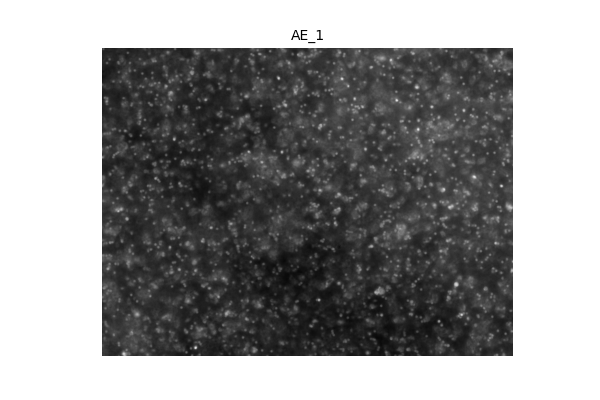

<IPython.core.display.Javascript object>


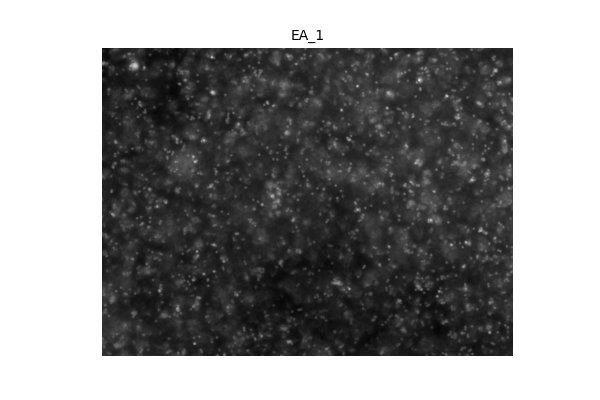

<IPython.core.display.Javascript object>


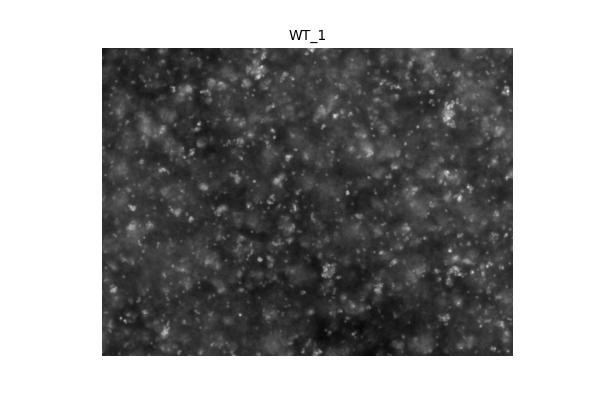

(-0.5, 1919.5, 1439.5, -0.5)

In [41]:
fig, ax4 = plt.subplots(figsize=(6,4)) 
title = str((chosen_tiff1.split('\\')[-1])[:-21]) #splits the full file name into only the relevent info
ax4.set_title(title, fontsize=10)
ax4.imshow(chosen_image1, cmap='gray') #'cmap' is the color map used to display the image, 'gray' is short for greyscale
ax4.axis('off')

fig, ax5 = plt.subplots(figsize=(6,4)) 
title = str((chosen_tiff2.split('\\')[-1])[:-21]) #splits the full file name into only the relevent info
ax5.set_title(title, fontsize=10)
ax5.imshow(chosen_image2, cmap='gray') #'cmap' is the color map used to display the image, 'gray' is short for greyscale
ax5.axis('off')

fig, ax6 = plt.subplots(figsize=(6,4)) 
title = str((chosen_tiff3.split('\\')[-1])[:-21]) #splits the full file name into only the relevent info
ax6.set_title(title, fontsize=10)
ax6.imshow(chosen_image3, cmap='gray') #'cmap' is the color map used to display the image, 'gray' is short for greyscale
ax6.axis('off')

<IPython.core.display.Javascript object>


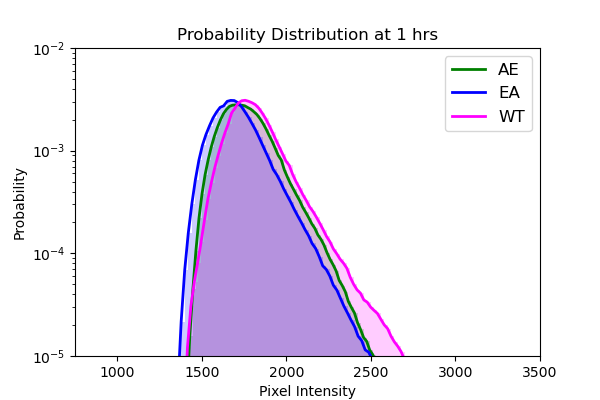

In [50]:
%matplotlib notebook

c1 = "green" #AE = green, EA = blue, WT = magenta
c2 = "blue"
c3 = "magenta"

bin_num = 100 # number of histogram bins, changing this effects the histogram (can be set to "auto")

fig, ax = plt.subplots(figsize=(6,4)) #set up 'figure 1' - raw intensity values
probabilities, bins = np.histogram(chosen_image1.ravel(), bins=bin_num, density = True)
ax.plot(bins[:-1], probabilities, 'o-', linewidth=2, markersize=0, color = c1, alpha = 1, label = exp1)
counts, bins, bars = ax.hist(chosen_image1.ravel(), bins=bin_num, density = True, color = c1, alpha = 0.2, 
                              histtype = "stepfilled")

chosen_image2 = tiff_file.imread(chosen_tiff2, key=[0])
probabilities2, bins2 = np.histogram(chosen_image2.ravel(), bins=bin_num, density = True)
ax.plot(bins2[:-1], probabilities2, 'o-', linewidth=2, markersize=0, color = c2, alpha = 1, label = exp2)
counts2, bins2, bars2 = ax.hist(chosen_image2.ravel(), bins=bin_num, density = True, color = c2, alpha = 0.2, 
                              histtype = "stepfilled")


chosen_image3 = tiff_file.imread(chosen_tiff3, key=[0])
probabilities3, bins3 = np.histogram(chosen_image3.ravel(), bins=bin_num, density = True)
ax.plot(bins3[:-1], probabilities3, 'o-', linewidth=2, markersize=0, color = c3, alpha = 1, label = exp3)
counts3, bins3, bars3 = ax.hist(chosen_image3.ravel(), bins=bin_num, density = True, color = c3, alpha = 0.2, 
                              histtype = "stepfilled")

                                                 #plots a histogram for a given list; 
                                                 #___.ravel() converts a 2D image array to a 1D list of pixel intensities
ax.set_xlim(750, 3500)
ax.set_ylim(10E-6, 10E-3)  
ax.set_yscale('log')
ax.set_xlabel("Pixel Intensity")
ax.set_ylabel("Probability")
ax.legend(loc = "upper right", fontsize =12)
ax.set_title("Probability Distribution at " + str(time) + " hrs", fontsize=12)
fig.savefig(plot_saveto + "probability histogram for " + image_time + ".jpg", dpi=800, bbox_inches = 'tight', transparent=True)   
plt.show()

<IPython.core.display.Javascript object>


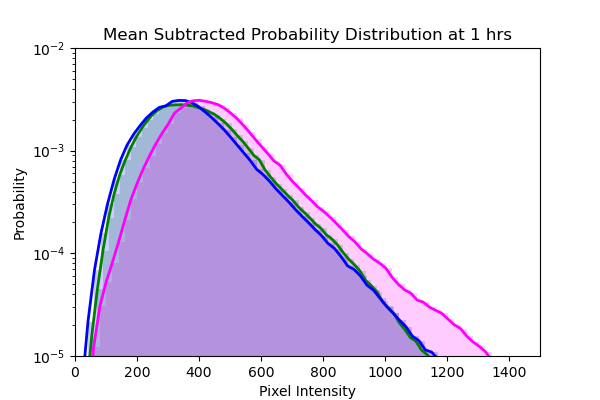

In [51]:
fig, ax2 = plt.subplots(figsize=(6,4)) #set up 'figure 2' - mean subtraction
all_intensities_list1 = subtract_mean_and_shift(chosen_image1) #subtract_mean_and_shift
all_intensities_list2 = subtract_mean_and_shift(chosen_image2)
all_intensities_list3 = subtract_mean_and_shift(chosen_image3)

probabilities_subtract_mean, bins_subtract_mean = np.histogram(all_intensities_list1, bins=bin_num, density = True)
ax2.plot(bins_subtract_mean[:-1], probabilities_subtract_mean, 'o-', linewidth=2, markersize=0, color = c1, alpha = 1, 
        label = exp1)
counts_subtract_mean, bins_subtract_mean, bars_subtract_mean = ax2.hist(all_intensities_list1, bins=bin_num, density = True, 
                                                                       color = c1, alpha = 0.2, histtype = "stepfilled")

chosen_image2 = tiff_file.imread(chosen_tiff2, key=[0])
probabilities_subtract_mean2, bins_subtract_mean2 = np.histogram(all_intensities_list2, bins=bin_num, density = True)
ax2.plot(bins_subtract_mean2[:-1], probabilities_subtract_mean2, 'o-', linewidth=2, markersize=0, color = c2, alpha = 1, 
        label = exp2)
counts_subtract_mean2, bins_subtract_mean2, bars_subtract_mean2 = ax2.hist(all_intensities_list2, bins=bin_num, density = True, 
                                                                          color = c2, alpha = 0.2, histtype = "stepfilled")


chosen_image3 = tiff_file.imread(chosen_tiff3, key=[0])
probabilities_subtract_mean3, bins_subtract_mean3 = np.histogram(all_intensities_list3, bins=bin_num, density = True)
ax2.plot(bins_subtract_mean3[:-1], probabilities_subtract_mean3, 'o-', linewidth=2, markersize=0, color = c3, alpha = 1, 
        label = exp3)
counts_subtract_mean3, bins_subtract_mean3, bars_subtract_mean3 = ax2.hist(all_intensities_list3, bins=bin_num, density = True, 
                                                                          color = c3, alpha = 0.2, histtype = "stepfilled")
ax2.set_xlim(0,1500)
ax2.set_ylim(10E-6, 10E-3)
ax2.set_yscale('log')
ax2.set_xlabel("Pixel Intensity")
ax2.set_ylabel("Probability")
ax.legend(loc = "upper right", fontsize =12)
ax2.set_title("Mean Subtracted Probability Distribution at " + str(time) + " hrs", fontsize=12)
fig.savefig(plot_saveto + "mean subtracted histogram for " + image_time + ".jpg", dpi=800, bbox_inches = 'tight', transparent=True)  
plt.show()

<IPython.core.display.Javascript object>


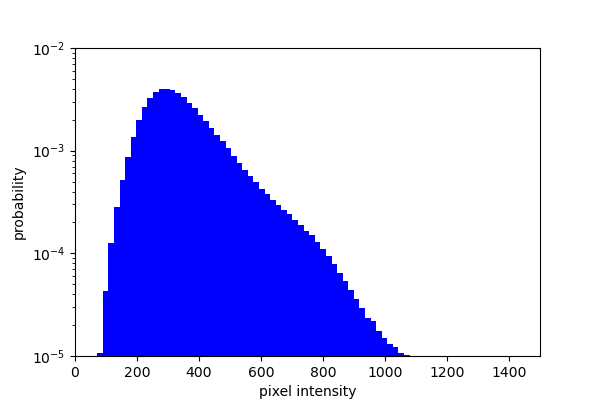

In [44]:
fig, ax3 = plt.subplots(figsize=(6,4)) #set up 'figure 3' - background subtraction
all_intensities_list = filter_and_shift(chosen_image, 1000) 
ax3.hist(all_intensities_list, bins=bin_num, density = True, color = c)
ax3.set_xlim(0,1500)
ax3.set_ylim(10E-6, 10E-3)
ax3.set_yscale('log')
ax3.set_xlabel("pixel intensity")
ax3.set_ylabel("probability")
fig.savefig(plot_saveto + "filtered histogram for " + title + ".jpg")  
plt.show()

In [102]:
histogram_dict = {}     #makes dictionary

histogram_dict["AE"] = {}     #makes subdictionary for AE files
histogram_dict["AE"][probabilities] = probabilities
histogram_dict["AE"][probabilities] = probabilities_subtract_mean
histogram_dict["AE"][bins] = bins
histogram_dict["AE"][bins]= bins_subtract_mean

histogram_dict["EA"] = {}     #makes subdictionary for EA files
histogram_dict["EA"][probabilities] = probabilities2
histogram_dict["EA"][probabilities] = probabilities_subtract_mean2
histogram_dict["EA"][bins] = bins2
histogram_dict["EA"][bins]= bins_subtract_mean2

histogram_dict["WT"] = {}     #makes subdictionary for WT files
histogram_dict["WT"][probabilities] = probabilities3
histogram_dict["WT"][probabilities] = probabilities_subtract_mean3
histogram_dict["WT"][bins] = bins3
histogram_dict["WT"][bins]= bins_subtract_mean3

with open("1x WT bead" + date + ".pkl", 'wb') as f:     #saves intensity data
    pickle.dump(histogram_dict, f)